## Image processing with Pillow

In [1]:
import sys
! "{sys.executable}" -m pip install Pillow

In [2]:
from PIL import Image
myimage = Image.open("./images/cookie.jpg")
myimage.show()

as you saw by running above code python will open the image your default image preview app. To have it open in jupyter notebook we need to use another library to display images

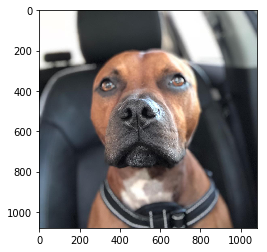

In [3]:
! "{sys.executable}" -m pip install matplotlib
! "{sys.executable}" -m pip install numpy

%matplotlib inline

from matplotlib.pyplot import imshow 
from numpy import array 

myimagearray=array(myimage)
imshow(myimagearray)

As you saw in the above code block, we can easily convert the PIL image to an array of pixels

In [4]:
print ('my image type:',type(myimage))
print ('my myimagearray type:',type(myimagearray))
print ('my myimagearray shape:',myimagearray.shape)

my image type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
my myimagearray type: <class 'numpy.ndarray'>
my myimagearray shape: (1080, 1080, 3)


You can easily plot histogram of colors used in the image

(array([157686., 724290., 781154., 468290., 372369., 247184., 194900.,
        168178., 103472., 281677.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

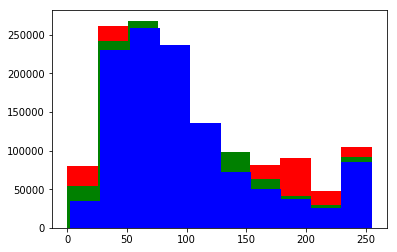

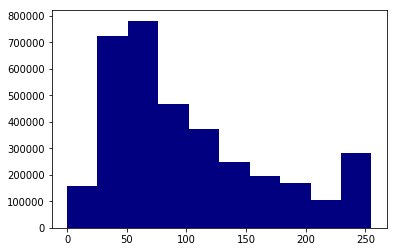

In [5]:
from matplotlib.pyplot import hist
from matplotlib.pyplot import figure

hist(myimagearray[:,:,0].flatten(),color='red')
hist(myimagearray[:,:,1].flatten(),color='green')
hist(myimagearray[:,:,2].flatten(),color='blue')

figure()
hist(myimagearray.flatten(),color='navy')

Let's define a method to show image histogram for further use

In [6]:
def showimagehist(image,title=""):
    
    imagearray=array(image)
    fig=figure(figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    if (len(imagearray.shape)==3):    
        hist(imagearray[:,:,0].flatten(),color='red')
        hist(imagearray[:,:,1].flatten(),color='green')
        hist(imagearray[:,:,2].flatten(),color='blue')
    else:
        hist(imagearray.flatten(),color='black')
    fig.add_subplot(rows, columns, 2)    
    hist(imagearray.flatten(),color='navy')

Now we can call showimagehist to see the image histogram

Now we can call showimagehist to see the image histogram

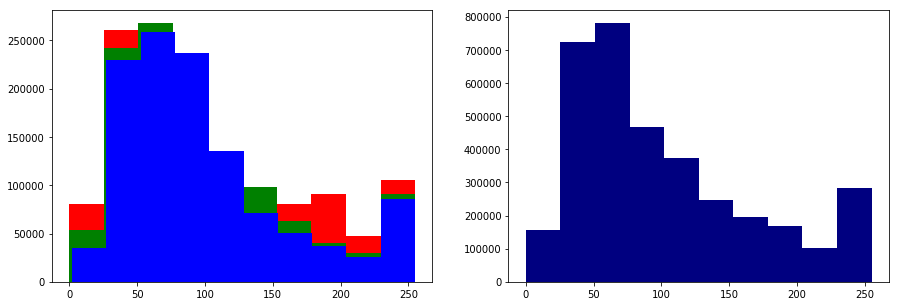

In [7]:
myimage = Image.open("./images/cookie.jpg")
showimagehist(myimage)

## Resize the image with keeping the ratio
We can resize the image by saving width/height ratio and saving it to disk

In [8]:
size=128,128
myimage.thumbnail(size)
myimage.save('./images/cookie128x128.jpg','JPEG')

now let's define a method to show before and after the image next to each other
We will check the image channels
If it's 3 means it is a coloured image and if it's 1 it means it's a geryscale image

In [9]:
def showbeforeafter(oldimage,newimage):
    
    oldimagearray=array(oldimage)
    newnewimagearray=array(newimage)
    print('old image shape',oldimagearray.shape, '|','new image shape',newnewimagearray.shape)
   
    
    fig=figure(figsize=(15, 5))
    columns = 2
    rows = 1
    ax1=fig.add_subplot(rows, columns, 1)
    ax1.set_title('before')
    if (len(oldimagearray.shape)==3):    
         imshow(oldimagearray)
    else:
        imshow(oldimagearray,cmap='gray')
        
    ax2=fig.add_subplot(rows, columns, 2)    
    ax2.set_title('after')
    if (len(newnewimagearray.shape)==3):    
         imshow(newnewimagearray)
    else:
        imshow(newnewimagearray,cmap='gray')
    

now we can see before and after of the image in one row

old image shape (1080, 1080, 3) | new image shape (128, 128, 3)


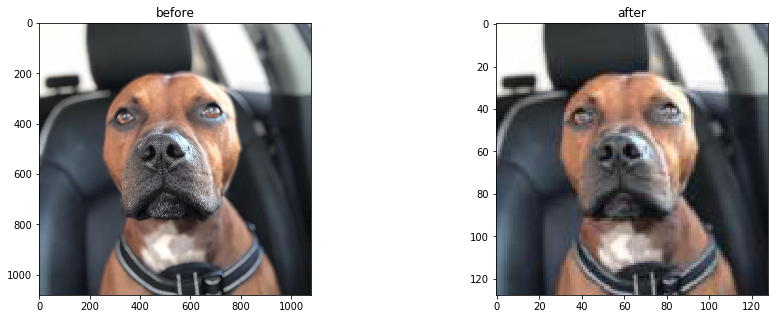

In [10]:
originalimage = Image.open("./images/cookie.jpg")
resizedimage=Image.open('./images/cookie128x128.jpg')
showbeforeafter(originalimage,resizedimage)

## open the image file and add border 

old image shape (128, 128, 3) | new image shape (188, 168, 3)


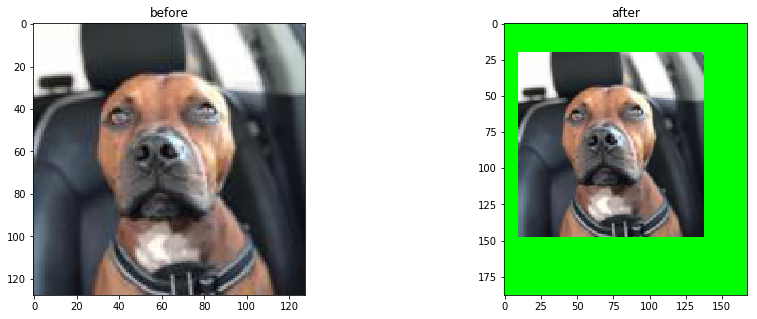

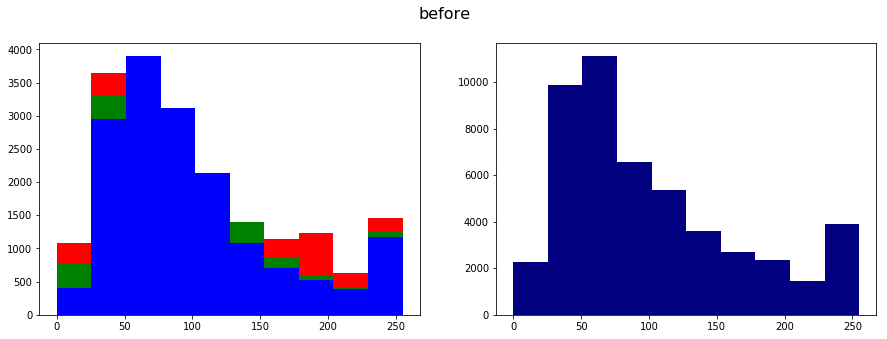

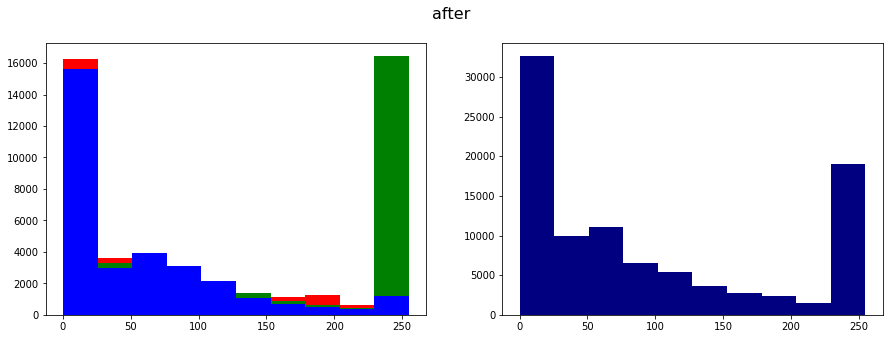

In [14]:
from PIL import ImageOps

originalimage = Image.open('./images/cookie128x128.jpg')

border=(10,20,30,40) #'left,top,right,bottom'
color='#00FF00'
expandedimage= ImageOps.expand(originalimage, border, color)

expandedimagearray=array(expandedimage)

showbeforeafter(originalimage,expandedimage)

showimagehist(originalimage,'before')

showimagehist(expandedimage,'after')


## equalize the image

old image shape (128, 128, 3) | new image shape (128, 128, 3)


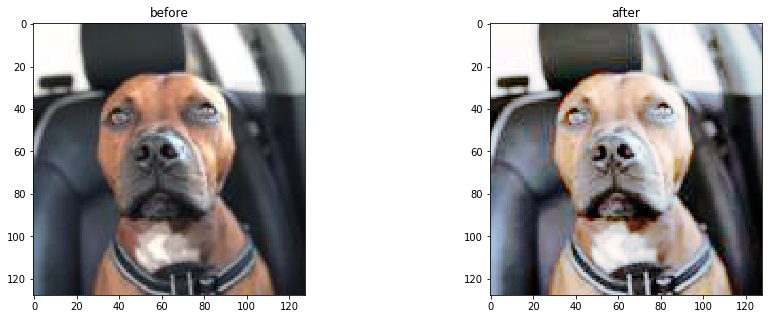

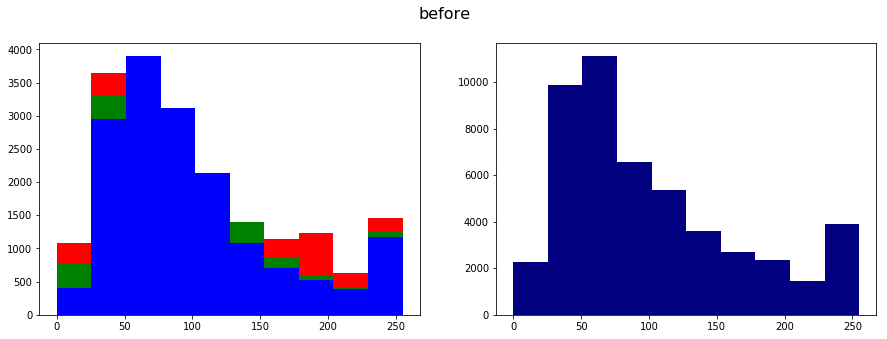

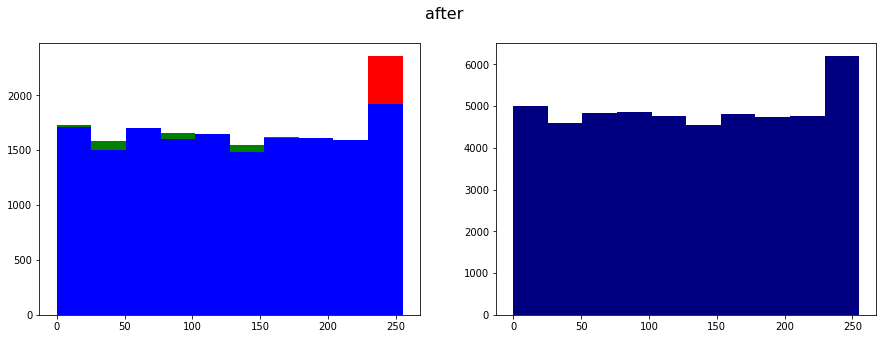

In [15]:
from PIL import ImageOps

originalimage = Image.open('./images/cookie128x128.jpg')

equalizedimage= ImageOps.equalize(originalimage)

showbeforeafter(originalimage,equalizedimage)

showimagehist(originalimage,'before')

showimagehist(equalizedimage,'after')

equalizedimage.save('./images/equalizedcookie128x128.jpg','JPEG')

## normalize the image

old image shape (128, 128, 3) | new image shape (128, 128, 3)


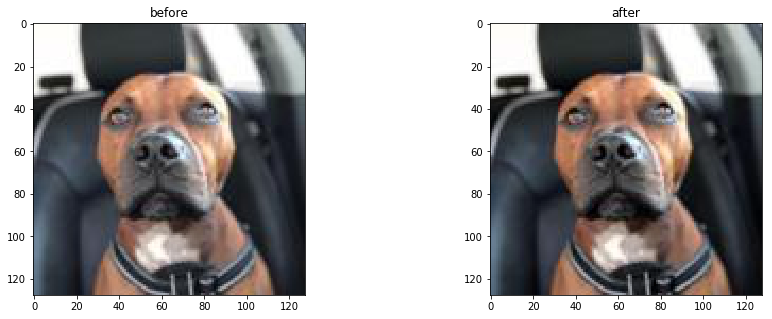

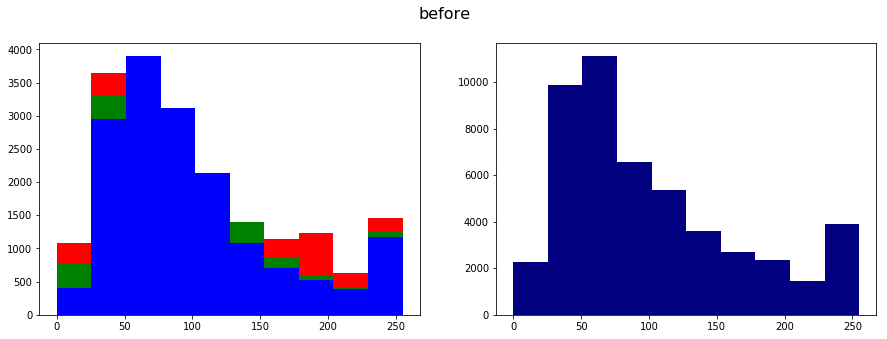

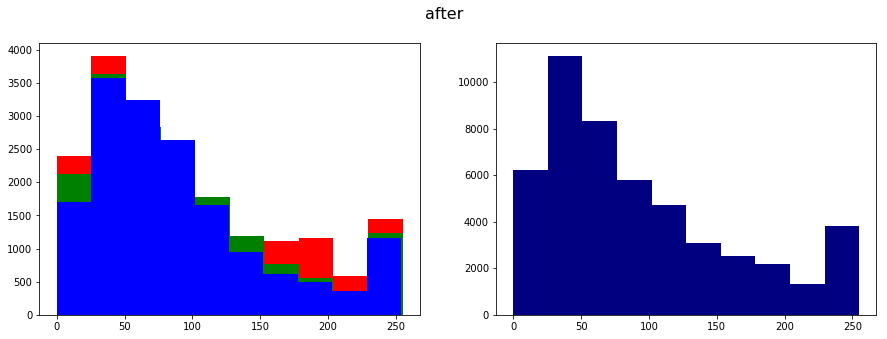

In [21]:
from PIL import ImageOps

originalimage = Image.open('./images/cookie128x128.jpg')

normalizedimage= ImageOps.autocontrast(originalimage,cutoff=0.2)

showbeforeafter(originalimage,normalizedimage)

showimagehist(originalimage,'before')

showimagehist(normalizedimage,'after')

normalizedimage.save('./images/normalizedcookie128x128.jpg','JPEG')

In [ ]:
## Grayscale Image

old image shape (128, 128, 3) | new image shape (128, 128)


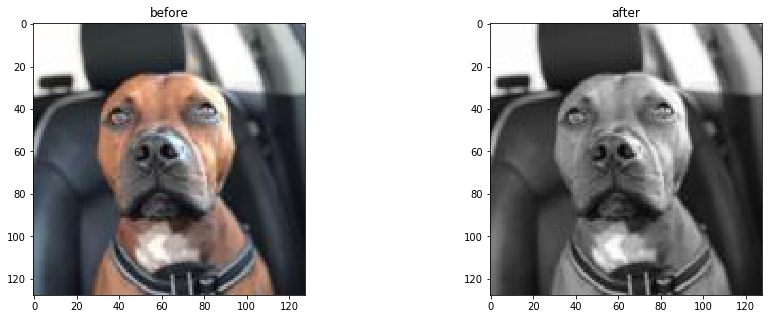

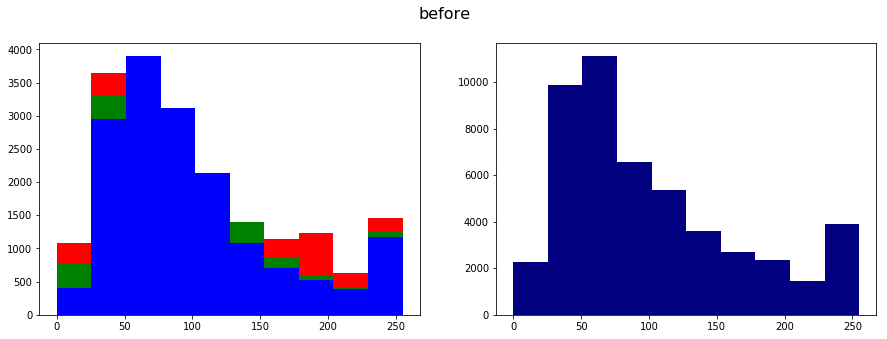

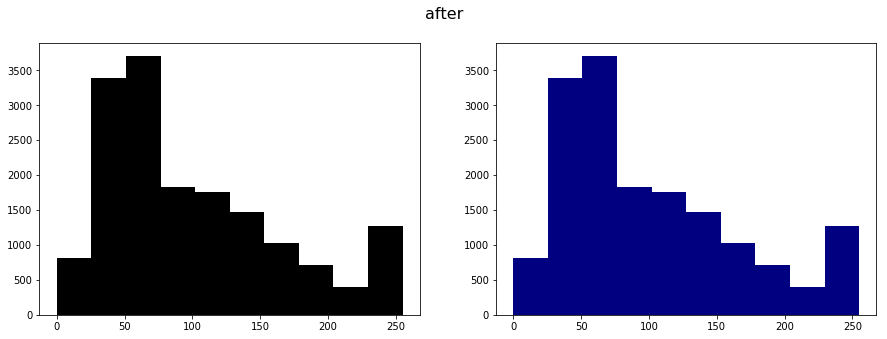

In [22]:
from PIL import ImageOps

originalimage = Image.open('./images/cookie128x128.jpg')

grayscaledimage= ImageOps.grayscale(originalimage)

showbeforeafter(originalimage,grayscaledimage)

showimagehist(originalimage,'before')

showimagehist(grayscaledimage,'after')

normalizedimage.save('./images/grayscaledcookie128x128.jpg','JPEG')
